## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df=pd.read_csv("/kaggle/input/ddos-dataset/DDoS.csv")

In [3]:
# df.head()

In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [7]:
df.drop(columns=['Fwd Header Length.1'], inplace=True)

In [8]:
#Unique values in the Label target column

# df.loc[:,'Label'].unique()

In [9]:
# def pltNullDistribution(df):
    
#     #Checking the null values in the dataset.
#     plt.figure(1, figsize = (10,4))
#     plt.hist(df.isna().sum())
    
#     # Set the title and axis labels
#     plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
#     plt.title('Null Values Distribution')
#     plt.xlabel('Classes')
#     plt.ylabel('Frequency')

#     # Show the plot
#     plt.show()
    
# pltNullDistribution(df)

In [10]:
# def plotMissingValues(df):
#     missing_values = df.isnull().sum()  # Counting null values for each column
#     fig = plt.figure(figsize=(16, 5))
#     missing_values.plot(kind='bar')
#     plt.xlabel("Features")
#     plt.ylabel("Missing values")
#     plt.title("Total number of Missing values in each feature")
#     plt.show()

# plotMissingValues(df)

The `df.dropna()` method in pandas is used to **remove missing values** (i.e., NaN or None) from a DataFrame. This method can be customized with various parameters to control which rows or columns are removed based on the presence of missing values.

In [11]:
data=df.dropna()

In [12]:
# pltNullDistribution(data)

In [13]:
data.loc[:, :] = data.replace([np.inf, -np.inf], np.nan)


In [14]:
# pltNullDistribution(data)

In [15]:





# data.dtypes

In [16]:
# for col in data.columns:
#     print(data[col].dtype)

In [17]:
data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})

/tmp/ipykernel_24/816821436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})


In [18]:
# plt.hist(data['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
# plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
# plt.title('Distribution of Labels')
# plt.xlabel("Classes")
# plt.ylabel("Count")
# plt.show()

In [19]:
# data.dtypes

In [20]:
# data.head()

## Data Exploring

In [21]:
# data.describe()

### plot distribution

In [22]:
# plt.figure(5)

# for col in data.columns:
#     plt.hist(data[col])
#     plt.title(col)
#     plt.show()

In [23]:
# plotMissingValues(data)

In [24]:
data = data.dropna()


In [25]:
# plotMissingValues(data)

## Test and Train Split

In [26]:
X = data.drop('Label', axis=1)
y = data['Label']

In [27]:
print(X.shape)
print(y.shape)


(225711, 77)
(225711,)


In [28]:
# Convert int64 to int32 and float64 to float32 preserving column-wise types


# column_types = X.dtypes

# for col in X.columns:
#     if np.issubdtype(column_types[col], np.int64):
#         X[col] = X[col].astype(np.int32)
#     elif np.issubdtype(column_types[col], np.float64):
#         X[col] = X[col].astype(np.float32)

In [29]:
# y = y.astype(np.int32)

In [30]:
# y.dtype

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [32]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)


In [33]:
pca = PCA(n_components=0.99)  # Keep components that explain 95% of variance
X_pca = pca.fit_transform(X_s)

In [34]:
print(X_pca.shape)

(225711, 29)


In [35]:
# df_pca = pd.DataFrame(X_pca)

In [36]:
# df_pca.head()

In [37]:
## with PCA
# Initial split to get 90% training and 10% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.10, random_state=42)

# Split the temporary set into 50% validation and 50% test (which results in 5% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [38]:
##without PCA
# Initial split to get 90% training and 10% temporary
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.10, random_state=42)

# # Split the temporary set into 50% validation and 50% test (which results in 5% each of the original data)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
# scaler = StandardScaler()
# X_train_s = scaler.fit_transform(X_train)
# X_test_s = scaler.transform(X_test)
# X_val_s = scaler.transform(X_val)

In [40]:
# print(X_train.shape)
# print(X_test.shape)
# print(X_val.shape)


#### saving scaler and pca for later use on real-time data

In [41]:
import joblib


In [42]:
# Save the scaler to a file
scaler_file = '/kaggle/working/scaler.pkl'
joblib.dump(scaler, scaler_file)

['/kaggle/working/scaler.pkl']

In [43]:
# Save the PCA to a file
pca_file = '/kaggle/working/pca.pkl'
joblib.dump(pca, pca_file)

['/kaggle/working/pca.pkl']

## Training the Model

In [44]:
# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [45]:
# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

## Random Forest

In [46]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

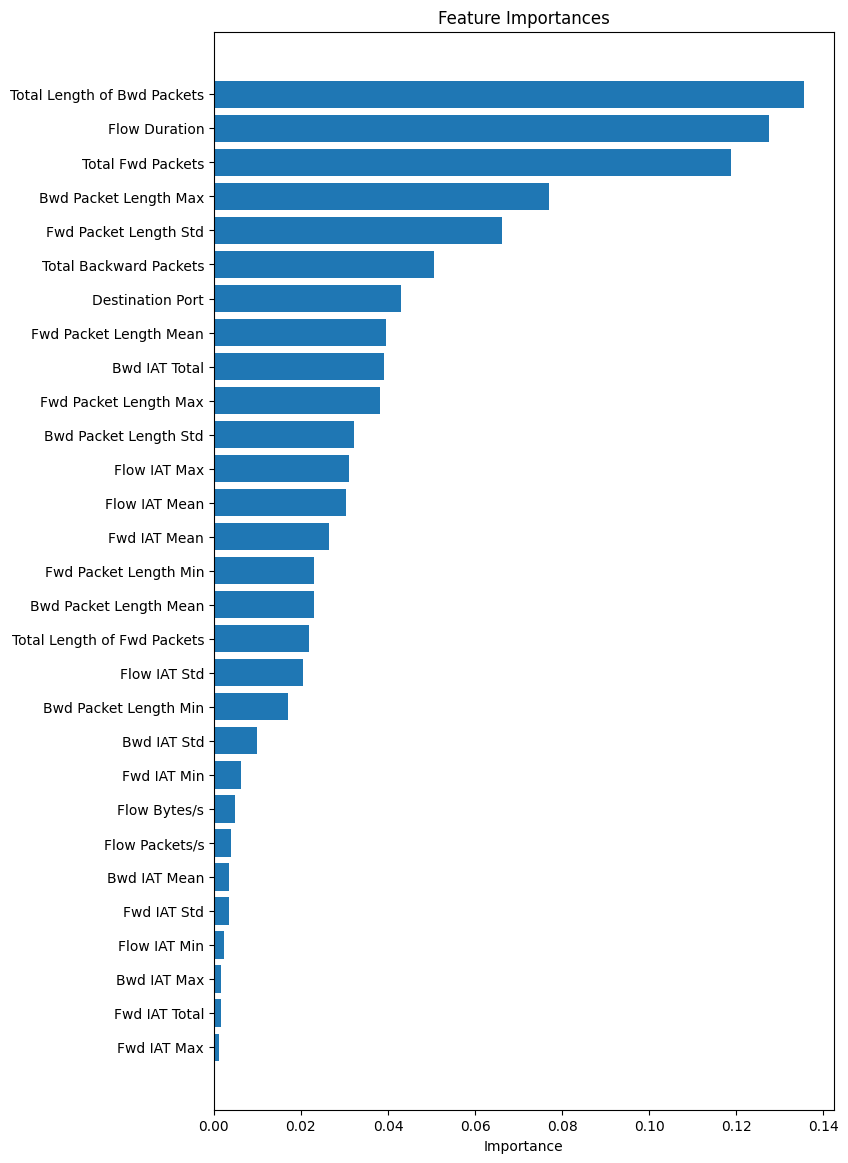

In [47]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"{df.columns[i]}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()




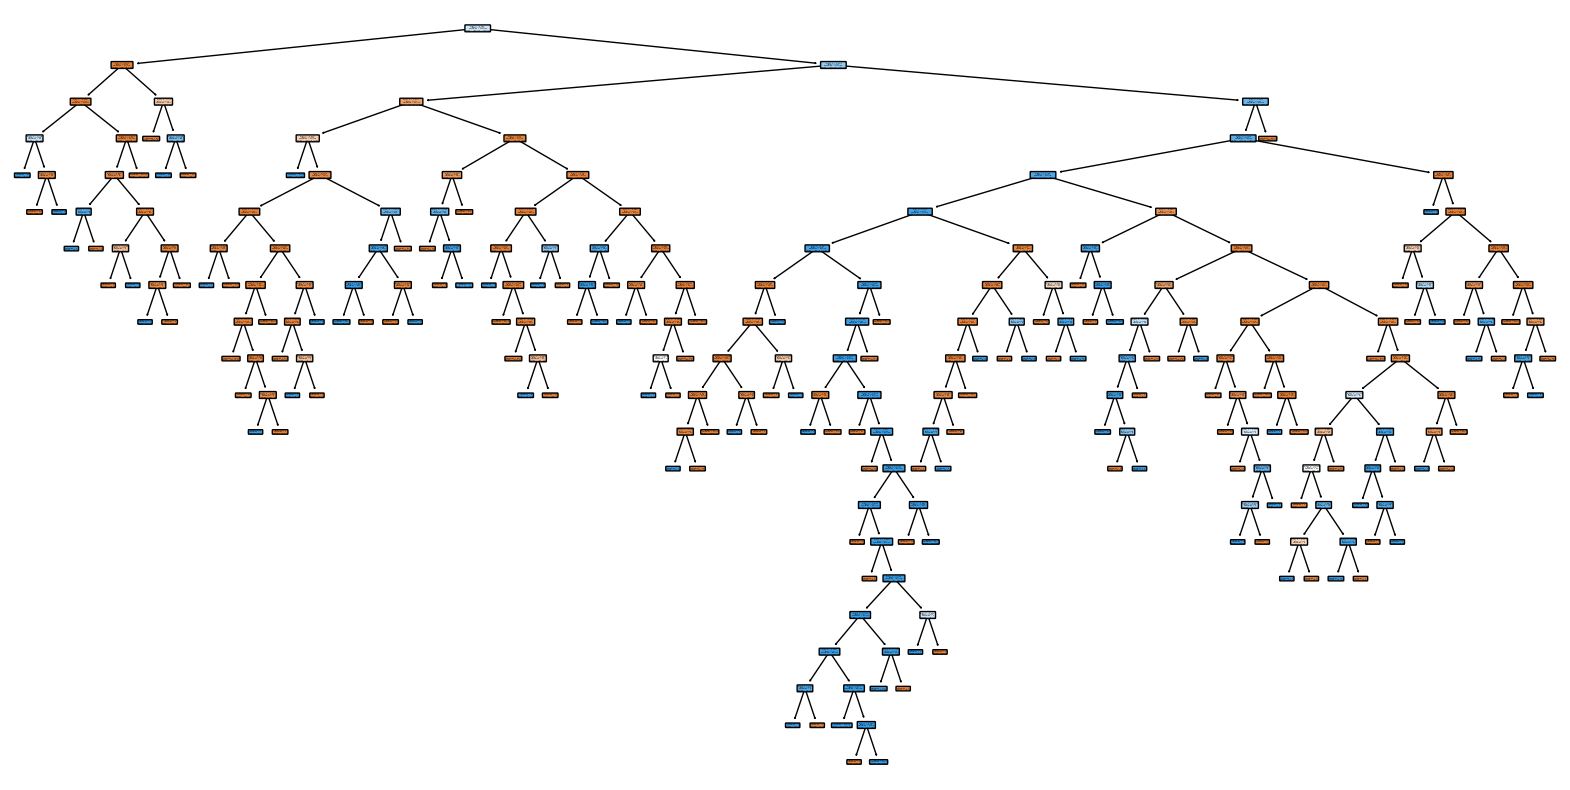

In [48]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

### Model Evaluation

In [49]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [50]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

In [51]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')



Random Forest Metrics:
Accuracy: 0.9996
F1 Score: 0.9997
Precision: 0.9998
Recall: 0.9995


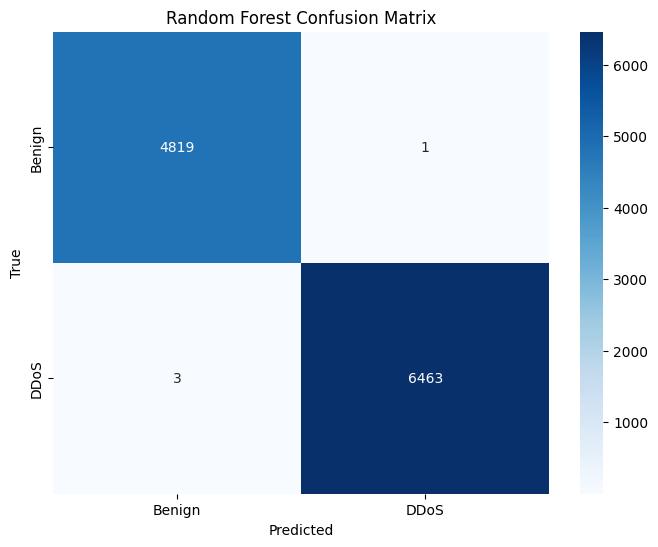

In [52]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

## logistic Regression

In [53]:
from sklearn.pipeline import make_pipeline

In [54]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=500))
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [55]:
from sklearn.linear_model import SGDClassifier
# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

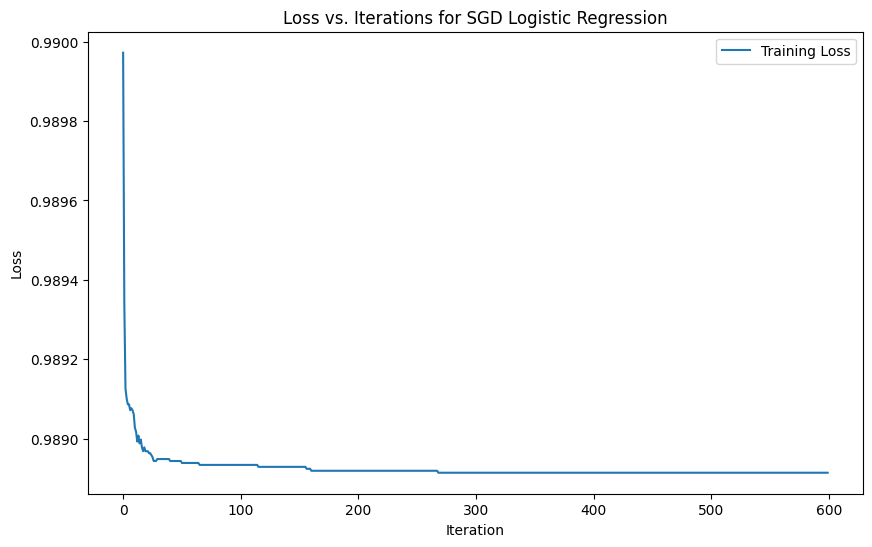

In [56]:
# Initialize the SGDClassifier with logistic loss
sgd = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)

# Lists to store the loss values and iteration numbers
losses = []
iterations = 600  # Number of iterations for training

# Train the model using partial_fit
for i in range(iterations):
    sgd.partial_fit(X_train_s, y_train, classes=np.unique(y_train))
    loss = sgd.score(X_train_s, y_train)  # Use negative accuracy as a proxy for loss
    losses.append(loss)

# Plot the loss against iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for SGD Logistic Regression')
plt.legend()
plt.show()

In [57]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [58]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9980
F1 Score: 0.9982
Precision: 0.9981
Recall: 0.9983


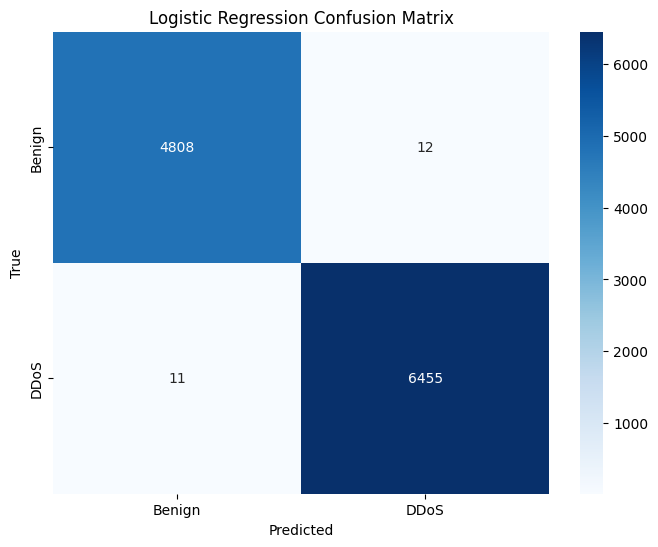

In [59]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


## Neural Network

In [60]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=600, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

In [61]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9991
F1 Score: 0.9992
Precision: 0.9998
Recall: 0.9986


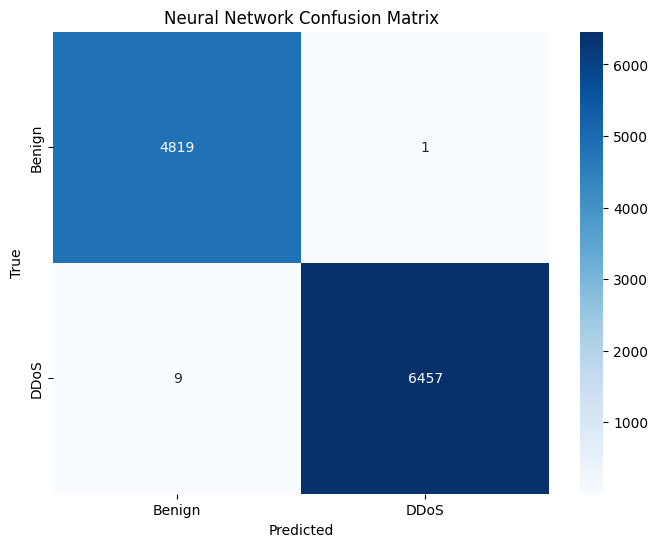

In [62]:
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')


In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_s, y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=1)

# Predict
nn_pred = model.predict(X_test_s)
nn_pred = (nn_pred > 0.5).astype(int)  # Convert probabilities to class labels

2024-07-10 01:43:53.082461: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 01:43:53.082585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 01:43:53.234425: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
 112/5079 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4907 - loss: 1.1290

I0000 00:00:1720575845.837206      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5079/5079 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9138 - loss: 0.2440 - val_accuracy: 0.9897 - val_loss: 0.0201
Epoch 2/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9936 - loss: 0.0172 - val_accuracy: 0.9982 - val_loss: 0.0095
Epoch 3/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9983 - loss: 0.0119 - val_accuracy: 0.9980 - val_loss: 0.0077
Epoch 4/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9987 - loss: 0.0080 - val_accuracy: 0.9984 - val_loss: 0.0058
Epoch 5/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9987 - loss: 0.0070 - val_accuracy: 0.9993 - val_loss: 0.0049
Epoch 6/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9988 - loss: 0.0060 - val_accuracy: 0.9991 - val_loss: 0.0037
Epoch 7/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9989 - loss: 0.0059 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 8/600
5079/5079 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9991 - loss: 0.0056 - va

In [64]:
print(X.shape)
print(y.shape)

(225711, 77)
(225711,)


## RNN Model

### Dividing data into window slices

### Sliding Window Function

In [65]:
def create_sliding_windows(data, window_size):
    """
    Create sliding windows from data.
    
    Parameters:
    data (numpy array): The transformed feature data.
    window_size (int): The size of the sliding window.
    
    Returns:
    numpy array: 3D array with shape (num_windows, window_size, num_features).
    """
    num_packets, num_features = data.shape
    num_windows = num_packets - window_size + 1
    
    windows = np.empty((num_windows, window_size, num_features))

    for i in range(num_windows):
        windows[i] = data[i:i + window_size]
    
    return windows

In [66]:
window_size = 100
windows = create_sliding_windows(X_train_s, window_size)

In [67]:
# np.save('windows_data.npy', windows)


In [68]:
# windows = np.load('windows_data.npy')


In [69]:
windows.shape

(203040, 100, 29)

In [70]:
window_size=100
windows_y = y_train[window_size - 1:]

In [71]:
windows_y

181292    1
195093    0
110551    1
905       0
219935    0
         ..
119895    0
103710    0
131949    1
146884    0
121974    1
Name: Label, Length: 203040, dtype: int64

### Generator Function

In [72]:
# num_samples = X_train_s.shape[0]

# split_index = int(0.9 * (num_samples - window_size + 1))

# # Split the data into training and validation sets
# X_train_s = X_train_s[:split_index + window_size - 1]
# y_train = y_train[:split_index + window_size - 1]
# X_val = X_train_s[split_index + window_size - 1:]
# y_val = y_train[split_index + window_size - 1:]


In [73]:
# print(X_train_s.shape)
# print(X_val_s.shape)

In [74]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, labels, window_size, batch_size):
        super().__init__()
        self.data = data
        self.labels = labels 
        self.window_size = window_size 
        self.batch_size = batch_size
        self.num_packets = data.shape[0]
        self.num_windows = self.num_packets - window_size + 1
    
#         print('window_size: ' , self.window_size)
#         print('batch_size: ', self.batch_size)
#         print('num_packets: ', self.num_packets)
#         print('num_windows: ', self.num_windows)
        
    def __len__(self):
        return int(np.ceil(self.num_windows / self.batch_size))

    def __getitem__(self, index):
        
       
        
        start_idx = index * self.batch_size
        end_idx = min((index + 1) * self.batch_size, self.num_windows)
#         print('start_index: ', start_idx)
#         print('end_index: ', end_idx)
        batch_windows = np.empty((end_idx - start_idx, self.window_size, self.data.shape[1]))
        
        for i in range(start_idx, end_idx):
            batch_windows[i - start_idx] = self.data[i:i + self.window_size]
        
        s = self.window_size - 1 + start_idx
        batch_labels = self.labels[s:s+(end_idx - start_idx)]
        
        return batch_windows, batch_labels

In [75]:
# Parameters
batch_size = 64
window_size = 100

# Initialize data generator without PCA
# train_generator = DataGenerator(X_train_s, y_train, window_size, batch_size)
# val_generator = DataGenerator(X_val_s, y_val, window_size, batch_size)


# Initialize data generator with PCA
train_generator = DataGenerator(X_train, y_train, window_size, batch_size)
val_generator = DataGenerator(X_val, y_val, window_size, batch_size)

In [76]:
for batch_idx in range(len(val_generator)):
    batch_x, batch_y = train_generator[batch_idx]
    print(f"Batch {batch_idx}:")
    print(f"  Batch X shape: {batch_x.shape}")
    print(f"  Batch Y shape: {batch_y.shape}")
    print()

Batch 0:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 1:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 2:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 3:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 4:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 5:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 6:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 7:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 8:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 9:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 10:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 11:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 12:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 13:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 14:
  Batch X shape: (64, 100, 29)
  Batch Y shape: (64,)

Batch 15:
  Batch X shape: (64, 100

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, BatchNormalization, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [78]:
def create_lstm_model(input_shape):
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=input_shape))
    
    # 1D Convolutional layer with reduced filters
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    
    # Bidirectional LSTM layers with Batch Normalization after every two layers
    model.add(Bidirectional(LSTM(64, return_sequences=True)))  
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Fully connected layers with Batch Normalization after each layer
    model.add(Dense(128, activation='relu'))  
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model


In [79]:
##with generator
# input_shape = (window_size, X_train_s.shape[1])

##with generator with PCA
input_shape = (window_size, X_train.shape[1])

In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 935 (3.66 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 624 (2.44 KB)

In [81]:
##without generator
# input_shape = windows.shape[1:]

In [82]:
with tf.device('/CPU:0'):
    model = create_lstm_model(input_shape)

In [83]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path where the best model will be saved
checkpoint_filepath = '/kaggle/working/best_model.keras'

# Create a ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy', # You can change this to 'val_loss' if you prefer to monitor validation loss
    save_best_only=True,
    save_weights_only=False,
    mode='max',  # Use 'min' if monitoring 'val_loss'
    verbose=1
)

In [84]:
##With generator
history = model.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1, callbacks=[checkpoint_callback])


Epoch 1/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8443 - loss: 0.3161
Epoch 1: val_accuracy improved from -inf to 0.99106, saving model to /kaggle/working/best_model.keras
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 189s 56ms/step - accuracy: 0.8443 - loss: 0.3160 - val_accuracy: 0.9911 - val_loss: 0.0321
Epoch 2/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9907 - loss: 0.0332
Epoch 2: val_accuracy improved from 0.99106 to 0.99535, saving model to /kaggle/working/best_model.keras
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 175s 55ms/step - accuracy: 0.9907 - loss: 0.0332 - val_accuracy: 0.9954 - val_loss: 0.0208
Epoch 3/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9953 - loss: 0.0193
Epoch 3: val_accuracy improved from 0.99535 to 0.99660, saving model to /kaggle/working/best_model.keras
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 176s 55ms/step - accuracy: 0.9953 - loss: 0.0193 - val_accuracy: 0.9966 - val_loss: 0.0135
Epoch 4/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - ac

In [85]:
##without generator
# history = model.fit(windows, windows_y, epochs = 40, validation_split=0.2, verbose = 1)


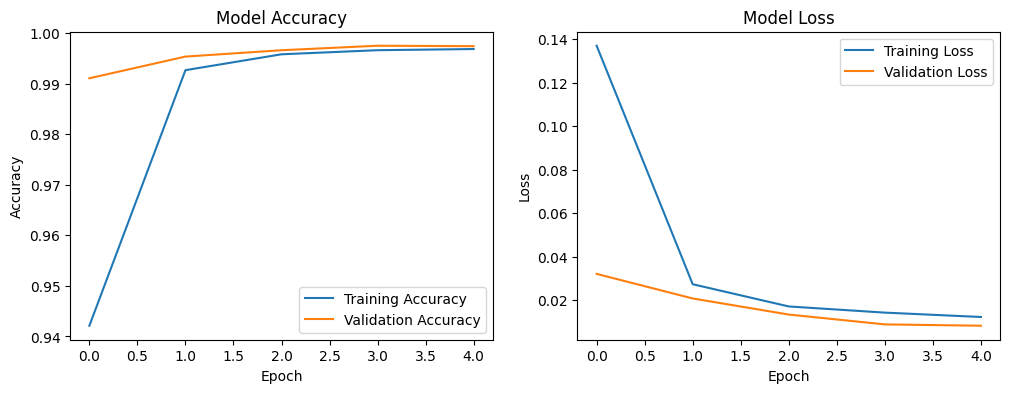

In [86]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Testing

In [87]:
new_data = X_test[:300]
new_labels = y_test[:300] 

In [88]:
print(new_data.shape)
print(new_labels.shape)

(300, 29)
(300,)


In [89]:
# Parameters for the new data
window_size = 100  # Same as used in training
batch_size = 64  # Same as used in training

# Initialize data generator for new data
new_data_generator = DataGenerator(new_data, new_labels, window_size, batch_size)

from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('/kaggle/working/best_model.keras')
predictions = []
for i in range(len(new_data_generator)):
    batch_data, _ = new_data_generator[i]
    batch_predictions = best_model.predict(batch_data)
    predictions.extend(batch_predictions)


# Convert predictions to a numpy array
predictions = np.array(predictions)

# If you want to see the predictions
print(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
[[1.2910124e-03]
 [4.4271725e-04]
 [3.0589002e-04]
 [9.9964511e-01]
 [9.9995255e-01]
 [9.9990535e-01]
 [9.9987054e-01]
 [9.9982798e-01]
 [9.9979484e-01]
 [9.9959147e-01]
 [4.4941503e-04]
 [4.1147525e-04]
 [9.9970442e-01]
 [9.9989188e-01]
 [9.9982762e-01]
 [4.0979713e-04]
 [9.9803609e-01]
 [9.9952078e-01]
 [3.1141139e-04]
 [2.6163945e-04]
 [9.9985909e-01]
 [9.9395269e-01]
 [9.9991298e-01]
 [9.9970585e-01]
 [9.9992919e-01]
 [9.9978125e-01]
 [9.9957019e-01]
 [9.9978209e-01]
 [9.9987018e-01]
 [9.9993849e-01]
 [9.9988937e-01]
 [2.4160200e-04]
 [9.9971646e-01]
 [5.2710646e-04]
 [9.9851984e-01]
 [9.9767452e-01]
 [2.8211850e-04]
 [1.6915443e-04]
 [9.9973220e-01]
 [9.9991190e-01]
 [3.3280914e-04]
 [9.9972194e-01]
 [9.9987650e-01]
 [9.9993002e-01]
 [9.9983346e-01]
 [3.4149794e-04]
 [2.1341779e-04]
 [1.7463756e-04]
 [9.9826127e-01]
 [9.9983370e-

In [90]:
print(len(new_data_generator))

4


In [91]:
print(predictions.shape)

(201, 1)


In [92]:
binary_predictions = (predictions >= 0.5).astype(int)

# If you want to see the binary predictions
print(binary_predictions)

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


# Getting predictions from real-time data

### Preprocessing new data

In [93]:
## Load the scaler from file
scaler_new = joblib.load('/kaggle/working/scaler.pkl')

## Load the PCA from file
pca_new = joblib.load('/kaggle/working/pca.pkl')

In [94]:
## Load the new data
file_path = "/kaggle/input/ddos-new/19-35-48.pcap_Flow.csv"
df_new=pd.read_csv(file_path)


In [95]:
## Handling columns' mismatch

col_names = df.columns
col_names_new = df_new.columns

In [96]:
# print(col_names)

In [97]:
# len(col_names)

In [98]:
# unmatched_cols = []
# for col in col_names_new:
#     if col not in col_names:
#         print(col, " not present in the original col list")
#         unmatched_cols.append(col)
#     else:
#         print(col, " matches the original col list")

In [99]:
# print(len(unmatched_cols))
# print(unmatched_cols)

In [100]:
# Save the 'Src IP' column to a separate variable before dropping it
src_ip_column = df_new['Src IP'].copy()


In [101]:
## Create a dictionary mapping old column names to new column names
column_replacements = {
    'Dst Port': 'Destination Port',
    'Total Fwd Packet': 'Total Fwd Packets',
    'Total Bwd packets': 'Total Backward Packets',
    'Total Length of Fwd Packet': 'Total Length of Fwd Packets',
    'Total Length of Bwd Packet': 'Total Length of Bwd Packets',
    'Packet Length Min': 'Min Packet Length',
    'Packet Length Max': 'Max Packet Length',
    'CWR Flag Count': 'CWE Flag Count',
    'Fwd Segment Size Avg': 'Avg Fwd Segment Size',
    'Bwd Segment Size Avg': 'Avg Bwd Segment Size',
    'Fwd Bytes/Bulk Avg': 'Fwd Avg Bytes/Bulk',
    'Fwd Packet/Bulk Avg': 'Fwd Avg Packets/Bulk',
    'Fwd Bulk Rate Avg': 'Fwd Avg Bulk Rate',
    'Bwd Bytes/Bulk Avg': 'Bwd Avg Bytes/Bulk',
    'Bwd Packet/Bulk Avg': 'Bwd Avg Packets/Bulk',
    'Bwd Bulk Rate Avg': 'Bwd Avg Bulk Rate',
    'FWD Init Win Bytes': 'Init_Win_bytes_forward',
    'Bwd Init Win Bytes': 'Init_Win_bytes_backward',
    'Fwd Act Data Pkts': 'act_data_pkt_fwd',
    'Fwd Seg Size Min': 'min_seg_size_forward'
}

## Rename the columns
df_new.rename(columns=column_replacements, inplace=True)


## Drop the extra columns
columns_to_drop = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Protocol', 'Timestamp']
df_new.drop(columns=columns_to_drop, inplace=True)

col_names_new = df_new.columns


In [102]:

# unmatched_cols = []
# for col in col_names_new:
#     if col not in col_names:
#         print(col, " not present in the original col list")
#         unmatched_cols.append(col)
#     else:
#         print(col, " matches the original col list")

In [103]:
# print(len(unmatched_cols))

In [104]:
# len(col_names_new) 

In [105]:
# col_names

In [106]:
assert list(col_names_new) == list(col_names), "Column names do not match!"


In [107]:
# col_names_new

In [108]:
print('Shape of the new dataset: ', df_new.shape)

Shape of the new dataset:  (65536, 78)


In [109]:
## Steps of preprocessing same as those done for training data

df_new.columns = df_new.columns.str.strip()
data_new=df_new.dropna()
data_new.loc[:, :] = data_new.replace([np.inf, -np.inf], np.nan)
data_new = data_new.dropna()
X_new = data_new.drop('Label', axis=1)

X_new_s = scaler_new.transform(X_new)
X_pca = pca_new.transform(X_new_s)

X_new = X_pca
print('Preprocessing Completed!')

Preprocessing Completed!


In [110]:
print(X_new.shape)

(65536, 29)


In [111]:
## Define the generator function

from tensorflow.keras.utils import Sequence

class NewDataGenerator(Sequence):
    def __init__(self, data, window_size, batch_size):
        super().__init__()
        self.data = data
        self.window_size = window_size 
        self.batch_size = batch_size
        self.num_packets = data.shape[0]
        self.num_windows = self.num_packets - window_size + 1
    
        
    def __len__(self):
        return int(np.ceil(self.num_windows / self.batch_size))

    def __getitem__(self, index):
               
        start_idx = index * self.batch_size
        end_idx = min((index + 1) * self.batch_size, self.num_windows)
        
        if start_idx >= self.num_windows:
            raise IndexError("This index is out of range for the number of windows.")

        batch_windows = np.empty((end_idx - start_idx, self.window_size, self.data.shape[1]))
    
        for i in range(start_idx, end_idx):
            batch_windows[i - start_idx] = self.data[i:i + self.window_size]
        
        batch_labels = np.zeros((end_idx - start_idx,))
        
        return batch_windows, batch_labels

In [112]:
## Execute the trained model to get predictions

# Parameters for the new data
window_size = 100  # Same as used in training
batch_size = 64  # Same as used in training

# Initialize data generator for new data
new_data_generator = NewDataGenerator(X_pca, window_size, batch_size)

from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('/kaggle/working/best_model.keras')
predictions = []
for i in range(len(new_data_generator)):
    batch_data, _ = new_data_generator[i]
    batch_predictions = best_model.predict(batch_data)
    predictions.extend(batch_predictions)


# Convert predictions to a numpy array
predictions = np.array(predictions)



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━

In [113]:
predictions = predictions.flatten()


In [114]:
# If you want to see the predictions
print(predictions)
print(predictions.shape)

[0.10618354 0.10831604 0.10810522 ... 0.10779849 0.10305179 0.08557363]
(65437,)


In [115]:
binary_predictions = (predictions >= 0.5).astype(int)

# If you want to see the binary predictions
print(binary_predictions)

[0 0 0 ... 0 0 0]


In [116]:
# Remove the first `window_size - 1` rows from src_ip_column
adjusted_ip_column = src_ip_column[window_size - 1:].reset_index(drop=True)


In [117]:
# Check if the length of adjusted_ip_column matches the length of predictions_flat
assert len(adjusted_ip_column) == len(binary_predictions), "Length mismatch between IPs and predictions"


In [118]:
# Create a DataFrame or Series with predictions and corresponding IP addresses
predictions_df = pd.DataFrame({
    'IP Address': adjusted_ip_column,  # The adjusted IP addresses
    'Prediction': binary_predictions  # The 1D array of predictions
})

# Now predictions_df should have IP addresses and corresponding predictions
print(predictions_df.head())

  IP Address  Prediction
0   10.0.0.1           0
1   10.0.0.1           0
2   10.0.0.1           0
3   10.0.0.1           0
4   10.0.0.1           0


In [119]:
# Filter for DDoS predictions (assuming DDoS is represented by class 1)
ddos_ips = predictions_df[predictions_df['Prediction'] == 1]['IP Address'].unique()

# Filter for normal traffic predictions (assuming normal traffic is represented by class 0)
normal_ips = predictions_df[predictions_df['Prediction'] == 0]['IP Address'].unique()


In [120]:
# Print out the IPs with DDoS
print("IPs with DDoS:")
print(ddos_ips)

# Print out the IPs with normal traffic
print("IPs with normal traffic:")
print(normal_ips)

IPs with DDoS:
[]
IPs with normal traffic:
['10.0.0.1']


In [121]:
# Print out the results to verify
print("Unique IPs with DDoS:")
print(ddos_ips if len(ddos_ips) > 0 else "No DDoS IPs found")

print("Unique IPs with normal traffic:")
print(normal_ips if len(normal_ips) > 0 else "No normal traffic IPs found")

# Optionally, print the count of unique DDoS and normal traffic IPs
print(f"Number of unique DDoS IPs: {len(ddos_ips)}")
print(f"Number of unique normal traffic IPs: {len(normal_ips)}")

Unique IPs with DDoS:
No DDoS IPs found
Unique IPs with normal traffic:
['10.0.0.1']
Number of unique DDoS IPs: 0
Number of unique normal traffic IPs: 1
